# Theory

**Опишите основные этапы проведения секвенирования в "мокрой" части лаборатории.**

- Выделение и очистка ДНК
- Оценка качества и количества ДНК
- ПЦР и амплификация целевых фрагментов
- Подготовка библиотек для секвенирования - ДНК-фрагменты подготавливаются для секвенирования. Это может включать лигирование адаптеров, фрагментацию и размерный отбор.
- Секвенирование



**Какие платформы для секвенирования вы знаете? Кратко опишите не менее трех
платформ, указав их основные характеристики и особенности**

1. Illumina:
   - Основана на циклических обратимых терминаторах
   - Обладает Высокой точностью и масштабируемостью, позволяет секвенировать большой объем данных за относительно короткие сроки
   - Illumina используется для широкого круга задач — от небольших исследований до проектов по созданию карт геномов

2. PacBio:
   - Использует платформу Single Molecule Real-Time секвенирования
   - Обеспечивает длинные риды, что полезно для секвенирования сложных геномов, таких как те, которые содержат повторяющиеся элементы
   - Более высокая частота ошибок в отдельных ридах по сравнению с Illumina, но ошибки случайны и можно устранить методом избыточности. Используется для сборки геномов de novo и для изучения структурных вариантов

3. Oxford Nanopore Technologies:
   - Секвенирование с помощью перемещения одиночных молекул ДНК через наноразмерные поры
   - Позволяет получать очень длинные риды, может быть портативной (устройства небольшие)
   - Может использоваться как в лабораторных, так и в полевых условиях

4. Секвенирование по Сэнгеру:
   - Основан на методе прерывания цепи, где используются ddNTPs, которые останавливают дальше цепочечное удлинение
   - Обеспечивает высокую точность, но имеет ограничение по длине ридов (~500-1000 нуклеотидов)
   - Широко применяется для секвенирования отдельных генов, проверки точности и в диагностических целях благодаря своей высокой точности. Также используется для подтверждения данных, полученных с использованием методов массового параллельного секвенирования. Метод Сэнгера часто выступает в качестве стандартного инструмента для начальных этапов генетических исследований или для проведения валидации и проверки точности результатов, полученных с помощью других технологий.


**Опишите стандартный биоинформатический пайплайн для анализа данных NGS
(DNA-seq). Кратко укажите цель каждого из них.**

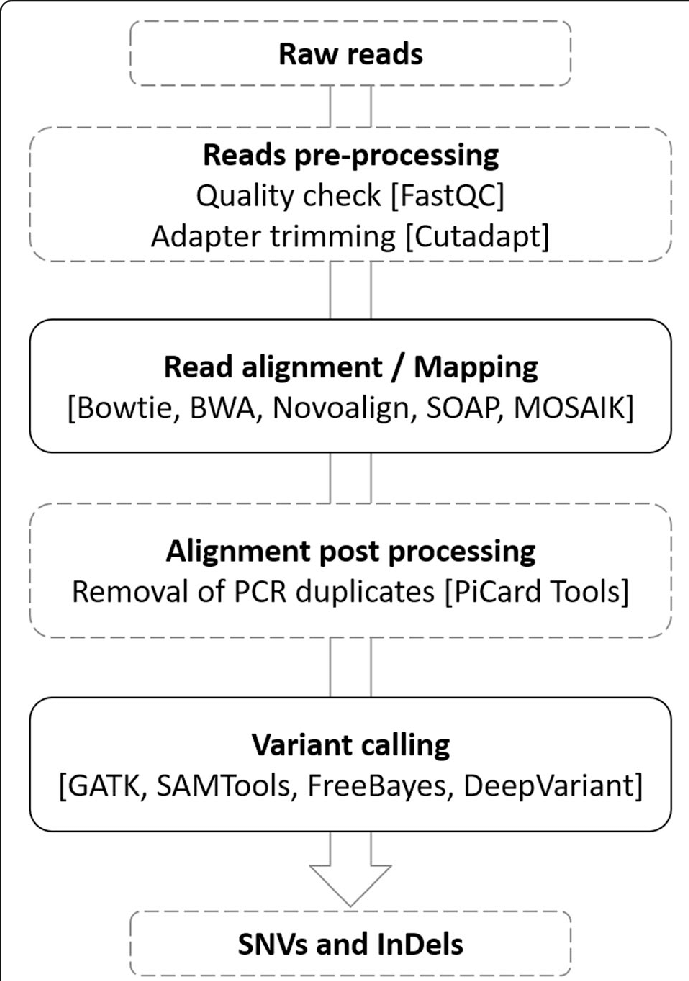

. Получение сырых данных после секвенирования:
   - Raw reads: Исходные прочтения из секвенатора, которые будут обрабатываться

2. Предварительная обработка ридов:
   - Quality check (FastQC): Анализ качества сырых данных.
   - Adapter trimming (Cutadapt): Обрезка адаптеров и низкокачественных сегментов

3. Выравнивание ридов / Мапирование:
   - Инструменты: Bowtie, BWA, Novoalign, SOAP, MOSAIK.
   - Цель: Сопоставление ридов с референсным геномом для точного локализации

4. Постобработка выравниваний:
   - Инструменты: Picard Tools.
   - Удаление дубликатов ПЦР: Устранение избыточных копий для корректного подсчета вариаций

5. Коллинг вариантов:
   - Инструменты: GATK, SAMTools, FreeBayes, DeepVariant.
   - Цель: Определение однонуклеотидных вариантов (SNVs) и инделов (вставок и делеции)

**Кратко опишите основные этапы пайплайна GATK для анализа наследуемых коротких инделов (indels) и однонуклеотидных полиморфизмов (SNPs).**

1. Подготовка данных:
   - Сначала риды выравниваются на референсный геном с помощью программ, например, BWA. Затем полученные выравнивания сортируются и сохраняются в специальный формат

2. Обработка данных:
   - Дубликаты, возникшие в процессе амплификации, отмечаются и удаляются, чтобы избежать ошибок в анализе
   - Особое внимание уделяется областям вокруг инделов для увеличения точности выявления
   - Проводится коррекция качества данных, чтобы исправить возможные ошибки в информации о нуклеотидах

3. Определение генетических вариантов:
   - Используется инструмент HaplotypeCaller для выявления генетических вариантов — SNPs и инделов

4. Фильтрация и аннотация:
   - Низкокачественные или сомнительные варианты отфильтровываются, чтобы получить только надежные данные. Аннотация добавляет дополнительную информацию по каждому варианту, например, какие эффекты они могут вызвать

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# GATK

In [ ]:
! wget -q https://github.com/broadinstitute/gatk/releases/download/4.6.1.0/gatk-4.6.1.0.zip

In [ ]:
%%bash
sudo apt-get update
sudo apt-get install -y openjdk-17-jdk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,190 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,525 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubun

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 16.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
! unzip -q gatk-4.6.1.0.zip

In [ ]:
!ls /content/drive/MyDrive/hw3_ngs

deepvar_output	reference  sample_10.bam


Запустим GATK, при этом указав необходимые флаги

- `REMOVE_DUPLICATES` : `true` - удаляем дубликаты


In [ ]:
%%bash
gatk-4.6.1.0/gatk MarkDuplicates \
  --REMOVE_DUPLICATES true \
  -I /content/drive/MyDrive/HW3_bioinf/sample_43.bam \
  -O sample_10_duplicates.bam \
  -M sample_10_metrics.txt

Tool returned:
0


Using GATK jar /content/gatk-4.6.1.0/gatk-package-4.6.1.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /content/gatk-4.6.1.0/gatk-package-4.6.1.0-local.jar MarkDuplicates --REMOVE_DUPLICATES true -I /content/drive/MyDrive/hw3_ngs/sample_10.bam -O sample_10_duplicates.bam -M sample_10_metrics.txt
19:59:27.480 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.6.1.0/gatk-package-4.6.1.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Thu Dec 05 19:59:27 UTC 2024] MarkDuplicates --INPUT /content/drive/MyDrive/hw3_ngs/sample_10.bam --OUTPUT sample_10_duplicates.bam --METRICS_FILE sample_10_metrics.txt --REMOVE_DUPLICATES true --MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP 50000 --MAX_FILE_HANDLES_FOR_READ_ENDS_MAP 8000 --SORTING_COLLECTION_SIZE_RATIO 0.25 --TAG_DUPLICATE_SET_MEMBERS false --REMOVE_SEQUENCING_DUPLI

Сохраняю на гугл диск, чтобы не ждать по новой

In [ ]:
!cp sample_10_duplicates.bam /content/drive/MyDrive/hw3_ngs

In [ ]:
!cp sample_10_metrics.txt /content/drive/MyDrive/hw3_ngs

👍👍👍ура класс

# DeepVariant

Мне подсказал однокурсник, что есть udocker, который избавит меня от некоторых страданий

In [ ]:
!pip -q install udocker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.6/119.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
!udocker --allow-root pull google/deepvariant:1.6.1

Info: creating repo: /root/.udocker
Info: udocker command line interface 1.3.17
Info: searching for udockertools >= 1.2.11
Info: installing udockertools 1.2.11
Info: installation of udockertools successful
Info: downloading layer sha256:0373ceb1ac9e561999580c513954376e36210dbbcb9c72d6e805cda52e7b266c
Info: downloading layer sha256:f7f6ac92e5aaa7f631c139928ed7be7d7f1b775a8149e6af2cbc8aa9e465fe0a
Info: downloading layer sha256:b18e9fad4b416c89b420bc1baad997ed478e0afc4eba9b8d532a1cda6b6bd742
Info: downloading layer sha256:487c239c194683f0f941d196eaffad71ca5656cf1cb7323356c78d78222f2ab2
Info: downloading layer sha256:c41df243586cc12a5fb9b087538264673717bb568e74f5bfb235a2a628de98e0
Info: downloading layer sha256:55ba17a1751728805ee2fed74add22ede87b77f56873242886f077a08a42c138
Info: downloading layer sha256:6dfdadc56afd1d5b3ec05bf863a99d601026709de88fbaed29aabbe82141e491
Info: downloading layer sha256:56377d92a8bdeaa7cb947ba8b0f5081cf82508a42ab1c94c6c5f0b5408e9e763
Info: downloading layer sh

# Samtools

In [ ]:
!apt-get -q install samtools
!samtools index /content/drive/MyDrive/hw3_ngs/sample_10_duplicates.bam

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 libhtscodecs2 samtools
0 upgraded, 3 newly installed, 0 to remove and 50 not upgraded.
Need to get 963 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 963 kB in 1s (1,524 kB/s)
Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 124574 files and directories currently installed.)
Preparing to unpack .../libhtscodecs2_1.1.1-3_amd64.deb ...
Unpacking libhtscodecs2:amd64 (1.1.1-3) ...
Select

In [ ]:
!ls /content/drive/MyDrive/hw3_ngs

deepvar_output			 reference	sample_10_duplicates.bam      sample_10_metrics.txt
idt_capture_novogene.grch38.bed  sample_10.bam	sample_10_duplicates.bam.bai


Далее делаю по [туториалу](https://github.com/google/deepvariant/blob/r1.6.1/docs/deepvariant-exome-case-study.md)

In [ ]:
# capture target BED file
!curl https://storage.googleapis.com/deepvariant/exome-case-study-testdata/idt_capture_novogene.grch38.bed > /content/drive/MyDrive/hw3_ngs/idt_capture_novogene.grch38.bed

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4739k  100 4739k    0     0  14.7M      0 --:--:-- --:--:-- --:--:-- 14.7M


In [ ]:
%%bash

INPUT="/content/drive/MyDrive/hw3_ngs"

mkdir -p "${INPUT}/deepvar_output"
mkdir -p "${INPUT}/deepvar_output/intermediate_results_dir"

In [ ]:
!ls /content/drive/MyDrive/hw3_ngs

deepvar_output			 reference	sample_10_duplicates.bam      sample_10_metrics.txt
idt_capture_novogene.grch38.bed  sample_10.bam	sample_10_duplicates.bam.bai


Запускаем DeepVariant в режиме WES

In [ ]:
%%bash

INPUT="/content/drive/MyDrive/hw3_ngs"
OUTPUT="${INPUT}/deepvar_output"
REF="${INPUT}/reference"
BIN_VERSION="1.6.1"

udocker --allow-root run \
  -v "${INPUT}":"/mnt/input" \
  -v "${OUTPUT}":"/mnt/output" \
  -v "${REF}":"/mnt/ref" \
  google/deepvariant:1.6.1 \
  /opt/deepvariant/bin/run_deepvariant \
  --model_type WES \
  --ref /mnt/ref/GRCh38.p14.genome.fa \
  --reads /mnt/input/sample_10_duplicates.bam \
  --regions /mnt/input/idt_capture_novogene.grch38.bed \
  --output_vcf /mnt/output/sample_10.output.vcf.gz \
  --output_gvcf /mnt/output/sample_10.output.g.vcf.gz \
  --num_shards $(nproc) \
  --intermediate_results_dir /mnt/output/intermediate_results_dir


***** Intermediate results will be written to /mnt/output/intermediate_results_dir in docker. ****


***** Running the command:*****
time seq 0 1 | parallel -q --halt 2 --line-buffer /opt/deepvariant/bin/make_examples --mode calling --ref "/mnt/ref/GRCh38.p14.genome.fa" --reads "/mnt/input/sample_10_duplicates.bam" --examples "/mnt/output/intermediate_results_dir/make_examples.tfrecord@2.gz" --channels "insert_size" --gvcf "/mnt/output/intermediate_results_dir/gvcf.tfrecord@2.gz" --regions "/mnt/input/idt_capture_novogene.grch38.bed" --task {}

I1205 22:15:17.296197 133492942133056 genomics_reader.py:222] Reading /mnt/input/sample_10_duplicates.bam with NativeSamReader
I1205 22:15:17.315263 133492942133056 make_examples_core.py:301] Task 1/2: Preparing inputs
I1205 22:15:18.038906 133492942133056 genomics_reader.py:222] Reading /mnt/input/sample_10_duplicates.bam with NativeSamReader
I1205 22:15:18.849599 133492942133056 make_examples_core.py:301] Task 1/2: Common contigs are ['chr1',

2024-12-05 22:14:33.552551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
I1205 22:14:48.046866 134011658262336 run_deepvariant.py:519] Re-using the directory for intermediate results in /mnt/output/intermediate_results_dir


In [ ]:
!ls /content/drive/MyDrive/hw3_ngs/deepvar_output

intermediate_results_dir   sample_10.output.g.vcf.gz.tbi  sample_10.output.vcf.gz.tbi
sample_10.output.g.vcf.gz  sample_10.output.vcf.gz	  sample_10.output.visual_report.html


DeepVariant отработал

Далее по туториалу benchmark on all chromosomes, но в рамках домашнего задания он нам не нужен

 # Filtering

In [ ]:
!gzip -d /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.output.vcf.gz

In [ ]:
!ls /content/drive/MyDrive/hw3_ngs/deepvar_output/

intermediate_results_dir   sample_10.output.g.vcf.gz.tbi  sample_10.output.vcf.gz.tbi
sample_10.output.g.vcf.gz  sample_10.output.vcf		  sample_10.output.visual_report.html


In [ ]:
!head -n20 /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.output.vcf
!tail -n20 /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.output.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##FILTER=<ID=RefCall,Description="Genotyping model thinks this site is reference.">
##FILTER=<ID=LowQual,Description="Confidence in this variant being real is below calling threshold.">
##FILTER=<ID=NoCall,Description="Site has depth=0 resulting in no call.">
##INFO=<ID=END,Number=1,Type=Integer,Description="End position (for use with symbolic alleles)">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Conditional genotype quality">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Read depth">
##FORMAT=<ID=MIN_DP,Number=1,Type=Integer,Description="Minimum DP observed within the GVCF block.">
##FORMAT=<ID=AD,Number=R,Type=Integer,Description="Read depth for each allele">
##FORMAT=<ID=VAF,Number=A,Type=Float,Description="Variant allele fractions.">
##FORMAT=<ID=PL,Number=G,Type=Integer,Description="Phred-scaled genotype likelihoods rounded to the close

In [ ]:
%%bash
grep -E '^#|PASS' /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.output.vcf > /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.filtered.vcf

In [ ]:
!head -n20 /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.filtered.vcf
!tail -n20 /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.filtered.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##FILTER=<ID=RefCall,Description="Genotyping model thinks this site is reference.">
##FILTER=<ID=LowQual,Description="Confidence in this variant being real is below calling threshold.">
##FILTER=<ID=NoCall,Description="Site has depth=0 resulting in no call.">
##INFO=<ID=END,Number=1,Type=Integer,Description="End position (for use with symbolic alleles)">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Conditional genotype quality">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Read depth">
##FORMAT=<ID=MIN_DP,Number=1,Type=Integer,Description="Minimum DP observed within the GVCF block.">
##FORMAT=<ID=AD,Number=R,Type=Integer,Description="Read depth for each allele">
##FORMAT=<ID=VAF,Number=A,Type=Float,Description="Variant allele fractions.">
##FORMAT=<ID=PL,Number=G,Type=Integer,Description="Phred-scaled genotype likelihoods rounded to the close

Видим, что остался только флаг PASS

# Annotation

## SnpEff

In [ ]:
!wget -q https://snpeff.blob.core.windows.net/versions/snpEff_latest_core.zip
!unzip -qq snpEff_latest_core.zip
!apt-get -q install openjdk-21-jdk

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-21-jdk-headless
  openjdk-21-jre openjdk-21-jre-headless x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-21-demo openjdk-21-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei | fonts-wqy-zenhei fonts-indic
  mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-21-jdk
  openjdk-21-jdk-headless openjdk-21-jre openjdk-21-jre-headless x11-utils
0 upgraded, 16 newly installed, 0 to remove and 49 not upgraded.
Need to get 137 MB of archives.
After this operati

In [ ]:
!java -jar snpEff/snpEff.jar download hg38

Флаг `canon` - аннотация будет проведена только для канонических транскриптов

In [ ]:
!java -jar snpEff/snpEff.jar -canon hg38 /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.filtered.vcf > sn_annotation.vcf

In [ ]:
%%bash
grep -v '^#' sn_annotation.vcf | head -n 5

chr1	69270	.	A	G	28.9	PASS	ANN=G|synonymous_variant|LOW|OR4F5|OR4F5|transcript|NM_001005484.1|protein_coding|1/1|c.180A>G|p.Ser60Ser|180/918|180/918|60/305||	GT:GQ:DP:AD:VAF:PL	1/1:25:24:0,24:1:28,27,0
chr1	69511	.	A	G	57.2	PASS	ANN=G|missense_variant|MODERATE|OR4F5|OR4F5|transcript|NM_001005484.1|protein_coding|1/1|c.421A>G|p.Thr141Ala|421/918|421/918|141/305||	GT:GQ:DP:AD:VAF:PL	1/1:42:270:0,270:1:57,42,0
chr1	69897	.	T	C	10.5	PASS	ANN=C|synonymous_variant|LOW|OR4F5|OR4F5|transcript|NM_001005484.1|protein_coding|1/1|c.807T>C|p.Ser269Ser|807/918|807/918|269/305||	GT:GQ:DP:AD:VAF:PL	0/1:4:7:2,5:0.714286:7,0,1
chr1	942451	.	T	C	53.1	PASS	ANN=C|missense_variant|MODERATE|SAMD11|SAMD11|transcript|NM_152486.3|protein_coding|10/14|c.1027T>C|p.Trp343Arg|1117/2557|1027/2046|343/681||,C|downstream_gene_variant|MODIFIER|NOC2L|NOC2L|transcript|NM_015658.4|protein_coding||c.*2243A>G|||||1752|	GT:GQ:DP:AD:VAF:PL	1/1:24:11:0,10:0.909091:53,23,0
chr1	944296	.	G	A	65.4	PASS	ANN=A|3_prime_UTR_variant|M

## Clinvar

In [ ]:
!wget -q https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz
!gzip -d clinvar.vcf.gz

In [ ]:
!java -Xmx4g -jar snpEff/SnpSift.jar annotate \
    clinvar.vcf \
    /content/drive/MyDrive/hw3_ngs/deepvar_output/sample_10.filtered.vcf > cv_annotation.vcf

In [ ]:
%%bash
grep -v '^#' cv_annotation.vcf | head -n 5

chr1	69270	.	A	G	28.9	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:25:24:0,24:1:28,27,0
chr1	69511	.	A	G	57.2	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:42:270:0,270:1:57,42,0
chr1	69897	.	T	C	10.5	PASS	.	GT:GQ:DP:AD:VAF:PL	0/1:4:7:2,5:0.714286:7,0,1
chr1	942451	1166513	T	C	53.1	PASS	AF_EXAC=0.99994;AF_TGP=1.00000;ALLELEID=1153723;CLNDISDB=MedGen:C3661900;CLNDN=not_provided;CLNHGVS=NC_000001.11:g.942451T>C;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=SAMD11:148398;MC=SO:0001583|missense_variant;ORIGIN=1;RS=6672356	GT:GQ:DP:AD:VAF:PL	1/1:24:11:0,10:0.909091:53,23,0
chr1	944296	.	G	A	65.4	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:51:25:0,25:1:65,51,0


In [ ]:
!java -Xmx4g -jar snpEff/SnpSift.jar annotate \
    clinvar.vcf \
    sn_annotation.vcf > res_cv_annotation.vcf

In [ ]:
%%bash
grep -v '^#' res_cv_annotation.vcf | head -n 20

chr1	69270	.	A	G	28.9	PASS	ANN=G|synonymous_variant|LOW|OR4F5|OR4F5|transcript|NM_001005484.1|protein_coding|1/1|c.180A>G|p.Ser60Ser|180/918|180/918|60/305||	GT:GQ:DP:AD:VAF:PL	1/1:25:24:0,24:1:28,27,0
chr1	69511	.	A	G	57.2	PASS	ANN=G|missense_variant|MODERATE|OR4F5|OR4F5|transcript|NM_001005484.1|protein_coding|1/1|c.421A>G|p.Thr141Ala|421/918|421/918|141/305||	GT:GQ:DP:AD:VAF:PL	1/1:42:270:0,270:1:57,42,0
chr1	69897	.	T	C	10.5	PASS	ANN=C|synonymous_variant|LOW|OR4F5|OR4F5|transcript|NM_001005484.1|protein_coding|1/1|c.807T>C|p.Ser269Ser|807/918|807/918|269/305||	GT:GQ:DP:AD:VAF:PL	0/1:4:7:2,5:0.714286:7,0,1
chr1	942451	1166513	T	C	53.1	PASS	ANN=C|missense_variant|MODERATE|SAMD11|SAMD11|transcript|NM_152486.3|protein_coding|10/14|c.1027T>C|p.Trp343Arg|1117/2557|1027/2046|343/681||,C|downstream_gene_variant|MODIFIER|NOC2L|NOC2L|transcript|NM_015658.4|protein_coding||c.*2243A>G|||||1752|;AF_EXAC=0.99994;AF_TGP=1.00000;ALLELEID=1153723;CLNDISDB=MedGen:C3661900;CLNDN=not_provided;CLNHGVS=

In [ ]:
!mkdir -p /content/drive/MyDrive/hw3_ngs/annotated

In [ ]:
!cp res_cv_annotation.vcf /content/drive/MyDrive/hw3_ngs/annotated

In [ ]:
!cp sn_annotation.vcf /content/drive/MyDrive/hw3_ngs/annotated
!cp cv_annotation.vcf /content/drive/MyDrive/hw3_ngs/annotated

# Pathogenic & Likely pathogenic filtering

In [ ]:
!ls /content/drive/MyDrive/hw3_ngs/annotated

cv_annotation.vcf  res_cv_annotation.vcf  sn_annotation.vcf


In [ ]:
# !java -jar snpEff/SnpSift.jar filter \
#     "(exists CLNSIG) & \
#     ((CLNSIG has 'Pathogenic') | \
#     (CLNSIG has 'Likely_pathogenic') | \
#     (CLNSIG has 'Pathogenic/Likely_pathogenic'))" \
#     /content/drive/MyDrive/hw3_ngs/annotated/res_cv_annotation.vcf > p_variants.vcf 2> filter.log

In [ ]:
!java -jar snpEff/SnpSift.jar filter \
    "(exists CLNSIG) & \
    (exists CLNSIGCONF) & \
    ((CLNSIG has 'Pathogenic') | \
    (CLNSIG has 'Likely_pathogenic') | \
    (CLNSIGCONF has 'Pathogenic') | \
    (CLNSIGCONF has 'Likely_pathogenic'))" \
    /content/drive/MyDrive/hw3_ngs/annotated/res_cv_annotation.vcf > p_variants.vcf 2> filter.log

In [ ]:
!cp p_variants.vcf /content/drive/MyDrive/hw3_ngs/

In [ ]:
!tail -n30 p_variants.vcf

##INFO=<ID=CLNVI,Number=.,Type=String,Description="the variant's clinical sources reported as tag-value pairs of database and variant identifier">
##INFO=<ID=AF_EXAC,Number=1,Type=Float,Description="allele frequencies from ExAC">
##INFO=<ID=ONCDN,Number=.,Type=String,Description="ClinVar's preferred disease name for the concept specified by disease identifiers in ONCDISDB">
##INFO=<ID=AF_ESP,Number=1,Type=Float,Description="allele frequencies from GO-ESP">
##INFO=<ID=CLNSIGINCL,Number=.,Type=String,Description="Germline classification for a haplotype or genotype that includes this variant. Reported as pairs of VariationID:classification; multiple values are separated by a vertical bar">
##INFO=<ID=CLNDISDB,Number=.,Type=String,Description="Tag-value pairs of disease database name and identifier submitted for germline classifications, e.g. OMIM:NNNNNN">
##INFO=<ID=GENEINFO,Number=1,Type=String,Description="Gene(s) for the variant reported as gene symbol:gene id. The gene symbol and id a

# Analysis & Conclusion

In [ ]:
import pandas as pd

with open('/content/drive/MyDrive/hw3_ngs/p_variants.vcf', 'r') as file:
    lines = [line for line in file if not line.startswith('##')]
header = lines[0].strip().split('\t')
data = [line.strip().split('\t') for line in lines[1:]]


df = pd.DataFrame(data, columns=header)
df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SRR22359471
0,chr1,226735804,1705897,G,T,66.4,PASS,ANN=T|missense_variant|MODERATE|ITPKB|ITPKB|tr...,GT:GQ:DP:AD:VAF:PL,"1/1:58:94:0,94:1:66,58,0"
1,chr1,226736237,1705899,A,C,60.7,PASS,ANN=C|missense_variant|MODERATE|ITPKB|ITPKB|tr...,GT:GQ:DP:AD:VAF:PL,"0/1:59:98:51,47:0.479592:60,0,63"
2,chr6,24503362,128343,C,T,70.2,PASS,ANN=T|missense_variant|MODERATE|ALDH5A1|ALDH5A...,GT:GQ:DP:AD:VAF:PL,"0/1:67:112:61,51:0.455357:70,0,70"
3,chr6,32038610,12183,A,T,42.4,PASS,ANN=T|missense_variant|MODERATE|CYP21A2|CYP21A...,GT:GQ:DP:AD:VAF:PL,"1/1:25:27:0,27:1:42,25,0"
4,chr8,106679222,1678542,A,G,63.5,PASS,ANN=G|missense_variant|MODERATE|OXR1|OXR1|tran...,GT:GQ:DP:AD:VAF:PL,"0/1:60:94:52,42:0.446809:63,0,63"
5,chr14,81091070,314693,G,C,59.6,PASS,ANN=C|missense_variant&splice_region_variant|M...,GT:GQ:DP:AD:VAF:PL,"0/1:59:70:37,33:0.471429:59,0,66"
6,chr16,69711242,16809,G,A,67.0,PASS,ANN=A|missense_variant|MODERATE|NQO1|NQO1|tran...,GT:GQ:DP:AD:VAF:PL,"1/1:57:29:0,29:1:66,57,0"
7,chr17,80385145,39700,G,A,64.3,PASS,ANN=A|missense_variant|MODERATE|RNF213|RNF213|...,GT:GQ:DP:AD:VAF:PL,"0/1:60:152:75,76:0.5:64,0,61"
8,chr18,57571588,562,A,G,70.7,PASS,ANN=G|intron_variant|MODIFIER|FECH|FECH|transc...,GT:GQ:DP:AD:VAF:PL,"1/1:67:58:0,58:1:70,70,0"
9,chr19,1615797,1165836,G,A,56.8,PASS,ANN=A|missense_variant|MODERATE|TCF3|TCF3|tran...,GT:GQ:DP:AD:VAF:PL,"1/1:28:12:0,12:1:56,28,0"


In [ ]:
# достанем rs id
def extract_rs_id(info):
    parts = info.split(';')
    for part in parts:
        if part.startswith('RS='):
            return 'rs' + part.split('=')[1]
    return None

In [ ]:
rs_ids = df['INFO'].apply(extract_rs_id)

In [ ]:
len(rs_ids.dropna())

9

In [ ]:
rs_ids.dropna().tolist()

['rs2760118',
 'rs9378252',
 'rs760874290',
 'rs1800566',
 'rs112735431',
 'rs2272783',
 'rs2074888',
 'rs771650894',
 'rs429358']

# rs2760118

В [SNPedia](https://www.snpedia.com/index.php/Rs2760118) ничего особо интересного не нет - разве что про ассоциацию с дислексией, но только по данным США и Англии

# rs9378252

Нет инфорации о каких-либо значимых мутациях

# rs760874290

В [генокарте](https://www.genokarta.ru/snps/rs760874290_G_C) и прочих источниках есть инфорация только о том, что нет доказанной связи с развитием рака яичников, а для заболеваний "Hypothyroidism due to TSH receptor mutations" и "Hypothyroidism due to TSH receptor mutations" клинический эффект этой мутации изучен недостаточно

# rs1800566

В [исследовании](https://pmc.ncbi.nlm.nih.gov/articles/PMC9627178/) показали, что полиморфизм rs1800566 гена NQO1 связан с предрасположенностью к раку и, возможно, является опухолевым маркером в их развитии. По данным SNPedia влияет на риск развития рака груди.

# rs112735431

Ассоциирован с moyamoya disease (редкое хроническое прогрессирующее заболевание сосудов головного мозга, для которого характерно медленное (в течение месяцев и лет) сужение просвета внутричерепных сегментов внутренних сонных артерий (ВСА) и начальных отделов передних мозговых артерий и средних мозговых артерий вплоть до их окклюзии). Но найденные исследования были проведены на данных корейцев - не думаю, что можно проецировать это на нашу работу.

# rs2272783

По данным [SNpedia](https://www.snpedia.com/index.php/Rs2272783), представляет собой мутацию в гене феррохелатазы FECH, приводящую к снижению экспрессии этого фермента. При транс-соединении с нефункциональным аллелем FECH это, вероятно, приводит к эритропоэтической протопорфирии - генетическому заболеванию, приводящему к тяжелой форме фотосенсибилизации

# rs2074888

Мутация в гене TCF3 - в сочетании с гистондеацетилазой 3 (HDAC3) подавляет регуляцию микроРНК-101, способствуя пролиферации клеток лимфомы Беркитта и ингибируя апоптоз.

# rs771650894

Нет инфорации о каких-либо значимых мутациях

# rs429358

В [статье](https://pmc.ncbi.nlm.nih.gov/articles/PMC9164079/) указано, что rs429358 гена APOE, который ассоциирорван с липидным профилем и риском сердечно-сосудистых заболеваний

# Conclusion

При анализе P/LP вариантов можно заметить, что многие из них ассоциированы с раком, но отдельное внимание стоит обратить на rs429358, поскольку ген APOE и в целом липидный профиль очень важны в кардиологических заболеваниях